In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('MNIST-data', one_hot=True)

X = tf.placeholder("float",[None, 784])
Y_ = tf.placeholder("float",[None, 10])

W = tf.Variable(tf.truncated_normal([784,10], stddev=0.1))
B = tf.Variable(tf.truncated_normal([10], stddev=0.1))

L1 = tf.matmul(X, W) + B
Y = tf.nn.softmax(L1)

loss = -tf.reduce_sum(Y_ * tf.log(Y)) #交叉熵cross_entropy
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss) #梯度下降法 最小化损失函数

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #r = sess.run(Y, feed_dict={X:mnist.train.images[:1]}) 直接预测 发现结果为[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
    for i in range(1000):
        batch_xs,batch_ys = mnist.train.next_batch(100) #从总体训练中提取一批进行训练，可以优化参数
        sess.run(optimizer, feed_dict={X:batch_xs, Y_:batch_ys})
#     p = sess.run(Y, feed_dict={X:mnist.test.images[:1]})  #看图验证结果
#     print(p)
#     print(tf.argmax(p,1))
#     plt.imshow(np.asarray(mnist.test.images[0]).reshape(28,28))
#     plt.show()
    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("accuracy on test_dataset", sess.run(accuracy, feed_dict={X:mnist.test.images, Y_:mnist.test.labels}))
    

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
accuracy on test_dataset 0.9072


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
[[1.0517460e-09 9.2462510e-14 2.0627058e-07 4.4273284e-07 9.2933398e-13
  3.5048542e-09 1.9418963e-15 9.9999928e-01 2.4492655e-10 7.7947622e-09]]


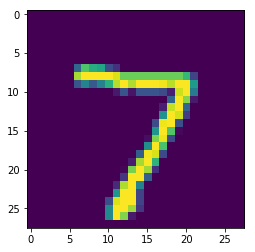

accuracy on test_dataset 0.9667818


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('MNIST-data') #, one_hot=True)

with tf.name_scope("input"):
    X = tf.placeholder("float",[None, 784])
    Y_ = tf.placeholder(tf.int64,[None])

with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.truncated_normal([784,500], stddev=0.1))
    B1 = tf.Variable(tf.truncated_normal([500], stddev=0.1))

    N1 = tf.matmul(X, W1) + B1
    L1 = tf.nn.relu(N1)
with tf.name_scope('dropout'):
    dropped = tf.nn.dropout(L1, tf.constant(1.0))

with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.truncated_normal([500,10], stddev=0.1))
    B2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

    N2 = tf.matmul(dropped, W2) + B2
    N21 = tf.identity(N2)
    Y = tf.nn.softmax(N21)

with tf.name_scope("train"):
    #loss = -tf.reduce_sum(Y_ * tf.log(Y)) #交叉熵cross_entropy
    loss = tf.losses.sparse_softmax_cross_entropy(labels=Y_, logits=Y)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(loss) #梯度下降法 最小化损失函数

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #r = sess.run(Y, feed_dict={X:mnist.train.images[:1]}) 直接预测 发现结果为[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
    for i in range(1000):
        batch_xs,batch_ys = mnist.train.next_batch(100) #从总体训练中提取一批进行训练，可以优化参数
        sess.run(optimizer, feed_dict={X:batch_xs, Y_:batch_ys})
    p = sess.run(Y, feed_dict={X:mnist.test.images[:1]})  #看图验证结果
    print(p)
    plt.imshow(np.asarray(mnist.test.images[0]).reshape(28,28))
    plt.show()
    correct_prediction = tf.equal(tf.argmax(Y,1), Y_)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("accuracy on test_dataset", sess.run(accuracy, feed_dict={X:mnist.train.images, Y_:mnist.train.labels}))
    tf.summary.FileWriter('./logs', sess.graph)
    

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import graph_util

mnist = input_data.read_data_sets('MNIST-data', one_hot=True)

with tf.name_scope("input"):
    X = tf.placeholder("float",[None, 784], name="x")
    Y_ = tf.placeholder("float",[None, 10], name="y")

def nn_layer(input_tensor, input_dim, output_dim, layer_name="layer", act=tf.nn.relu):
    with tf.name_scope(layer_name):
        W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name="weight")
        B = tf.Variable(tf.truncated_normal([output_dim], stddev=0.1), name="bias")

        N = tf.matmul(input_tensor, W) + B
        Out = act(N)
        return Out
layer1 = nn_layer(X, 784, 500, "layer1")
layer2 = nn_layer(layer1, 500, 10, "layer2", tf.identity)

Y = tf.nn.softmax(layer2, name="output")

with tf.name_scope("train"):
    loss = -tf.reduce_sum(Y_ * tf.log(Y)) #交叉熵cross_entropy
    #loss = tf.losses.sparse_softmax_cross_entropy(labels=Y_, logits=Y)
    tf.summary.scalar('loss', loss)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(loss) #梯度下降法 最小化损失函数

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    tf.summary.scalar('accuracy', accuracy)

init = tf.global_variables_initializer()

merged = tf.summary.merge_all()

with tf.Session() as sess:
    log = tf.summary.FileWriter('./logs', sess.graph)
    sess.run(init)
    for i in range(1000):
        batch_xs,batch_ys = mnist.train.next_batch(100) #从总体训练中提取一批进行训练，可以优化参数
        summary,_ = sess.run([merged, optimizer], feed_dict={X:batch_xs, Y_:batch_ys})
        log.add_summary(summary, i)
        if i % 10 == 0:
            summary,ac = sess.run([merged,accuracy], feed_dict={X:mnist.train.images, Y_:mnist.train.labels})
            print("accuracy on test_dataset", ac)
            log.add_summary(summary, i)
    #save model
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['output'])
    with tf.gfile.FastGFile('./tf-model/model.pb', mode='wb') as f:
        f.write(constant_graph.SerializeToString())

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
accuracy on test_dataset 0.16267273
accuracy on test_dataset 0.7494
accuracy on test_dataset 0.8443091
accuracy on test_dataset 0.87243634
accuracy on test_dataset 0.8867273
accuracy on test_dataset 0.89543635
accuracy on test_dataset 0.9028909
accuracy on test_dataset 0.9043818
accuracy on test_data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import graph_util

cluster=tf.train.ClusterSpec({
    "worker": [
        "192.168.35.116:1234",
    ],
    "ps": [
        "192.168.35.115:1234"
    ]})

isps=False
if isps:
        server=tf.train.Server(cluster,job_name='ps',task_index=0)
        server.join()
else:
        server=tf.train.Server(cluster,job_name='worker',task_index=0)
        with tf.device(tf.train.replica_device_setter(worker_device='/job:worker/task:0',cluster=cluster)):

            mnist = input_data.read_data_sets('MNIST-data', one_hot=True)

            with tf.name_scope("input"):
                X = tf.placeholder("float",[None, 784], name="x")
                Y_ = tf.placeholder("float",[None, 10], name="y")

            def nn_layer(input_tensor, input_dim, output_dim, layer_name="layer", act=tf.nn.relu):
                with tf.name_scope(layer_name):
                    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name="weight")
                    B = tf.Variable(tf.truncated_normal([output_dim], stddev=0.1), name="bias")

                    N = tf.matmul(input_tensor, W) + B
                    Out = act(N)
                    return Out
            layer1 = nn_layer(X, 784, 500, "layer1")
            layer2 = nn_layer(layer1, 500, 10, "layer2", tf.identity)

            Y = tf.nn.softmax(layer2, name="output")

            with tf.name_scope("train"):
                loss = -tf.reduce_sum(Y_ * tf.log(Y)) #交叉熵cross_entropy
                #loss = tf.losses.sparse_softmax_cross_entropy(labels=Y_, logits=Y)
                tf.summary.scalar('loss', loss)
                optimizer = tf.train.AdamOptimizer(0.001).minimize(loss) #梯度下降法 最小化损失函数

            with tf.name_scope("accuracy"):
                correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                tf.summary.scalar('accuracy', accuracy)

init = tf.global_variables_initializer()
merged = tf.summary.merge_all()
saver = tf.train.Saver()
sv = tf.train.Supervisor(init_op=init, summary_op=merged, saver=saver)
with sv.prepare_or_wait_for_session(server.target) as sess:
    log = tf.summary.FileWriter('./logs', sess.graph)
    sess.run(init)
    for i in range(1000):
        batch_xs,batch_ys = mnist.train.next_batch(100) #从总体训练中提取一批进行训练，可以优化参数
        summary,_ = sess.run([merged, optimizer], feed_dict={X:batch_xs, Y_:batch_ys})
        log.add_summary(summary, i)
        if i % 10 == 0:
            summary,ac = sess.run([merged,accuracy], feed_dict={X:mnist.train.images, Y_:mnist.train.labels})
            print("accuracy on test_dataset", ac)
            log.add_summary(summary, i)
    #save model
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['output'])
    with tf.gfile.FastGFile('./tf-model/model.pb', mode='wb') as f:
        f.write(constant_graph.SerializeToString())